# Data Science - Module 2 - Final Project Submission

* Student Name: **James Toop**
* Student Pace: **Self Paced**
* Scheduled project review date/time: **TBC**
* Instructor name: **Jeff Herman**
* Blog post URL: **TBC**

## Table of Contents
1. [Business Case](#business-case)
2. [Exploratory Data Analysis](#eda)
    * [Discovery](#data-discovery)
    * [Preprocessing](#data-preprocessing)
    
3. [Regression Model](#regression-model)

---
<a name="business-case"></a>
# 1. Business Case

A property development company wants to better understand the different factors that influence the sale price of a property to better inform the planning, design and marketing of new build or renovated properties within the King County area of Washington State.  

To this end they are keen to use multivariate linear regression analysis to assist in their decision making processes, in particular the company are interested in understanding the following:

* What size of property to build? (including overall living space and number of bedrooms)
* What locations within the King County area offer the best return on investment?
* What should the final price of the property be?
* What effect does the age of a property have on price? (to show that newer houses sell for more than older houses that haven't been renovated).
* Is there an ideal living space to plot area ratio?

---
<a name="eda"></a>
# 2. Exploratory Data Analysis (EDA)

<a name="data-discovery"></a>
## Data Discovery

This section presents an initial step to investigate, understand and document the available data fields and relationships, highlighting any potential issues / shortcomings within the datasets supplied.

In [228]:
# Import the relevant libraries for data discovery and regression analysis
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

plt.style.use('seaborn')
# pd.set_option("max_rows", None)

In [2]:
# Import the relevant data file from the repository then inspect the data
house_sales = pd.read_csv('kc_house_data.csv')
house_sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
house_sales.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
house_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
# View unique values for specific category fields
view_values = np.sort(house_sales['view'].unique())
condition_values = np.sort(house_sales['condition'].unique())
grade_values = np.sort(house_sales['grade'].unique())
floor_values = np.sort(house_sales['floors'].unique())
zipcode_values = np.sort(house_sales['zipcode'].unique())

print(len(view_values),"view rating options:\n", view_values)
print(len(condition_values),"condition rating options:\n", condition_values)
print(len(grade_values),"grade rating options:\n", grade_values)
print(len(floor_values), "floor options:\n", floor_values)
print(len(zipcode_values),"zipcodes:\n", zipcode_values)

6 view rating options:
 [ 0.  1.  2.  3.  4. nan]
5 condition rating options:
 [1 2 3 4 5]
11 grade rating options:
 [ 3  4  5  6  7  8  9 10 11 12 13]
6 floor options:
 [1.  1.5 2.  2.5 3.  3.5]
70 zipcodes:
 [98001 98002 98003 98004 98005 98006 98007 98008 98010 98011 98014 98019
 98022 98023 98024 98027 98028 98029 98030 98031 98032 98033 98034 98038
 98039 98040 98042 98045 98052 98053 98055 98056 98058 98059 98065 98070
 98072 98074 98075 98077 98092 98102 98103 98105 98106 98107 98108 98109
 98112 98115 98116 98117 98118 98119 98122 98125 98126 98133 98136 98144
 98146 98148 98155 98166 98168 98177 98178 98188 98198 98199]


In [6]:
# View value counts for specific category fields
print(house_sales['view'].value_counts(sort=False),"\n")
print(house_sales['waterfront'].value_counts(sort=False),"\n")
print(house_sales['grade'].value_counts(sort=False),"\n")
print(house_sales['condition'].value_counts(sort=False),"\n")

0.0    19422
3.0      508
4.0      317
2.0      957
1.0      330
Name: view, dtype: int64 

0.0    19075
1.0      146
Name: waterfront, dtype: int64 

3        1
4       27
5      242
6     2038
7     8974
8     6065
9     2615
10    1134
11     399
12      89
13      13
Name: grade, dtype: int64 

1       29
2      170
3    14020
4     5677
5     1701
Name: condition, dtype: int64 



In [7]:
# Review year renovated data as there are only 17755 records compared to the 21597 for other fields
house_sales['yr_renovated'].value_counts(ascending=False, dropna=False)

0.0       17011
NaN        3842
2014.0       73
2003.0       31
2013.0       31
          ...  
1944.0        1
1948.0        1
1976.0        1
1934.0        1
1953.0        1
Name: yr_renovated, Length: 71, dtype: int64

<a name="section1.1.1"></a>
### Updated Field Descriptions

Having reviewed and researched the column headings provided in the repository, here is some more detail as to the descriptions of the data fields including some clarification on certain values within the fields.

**id**
: a unique identifier for a property

**date**
: date property was sold (note: uses US date formatting)

**price**
: sale price (target variable)

**bedrooms**
: number of bedrooms

**bathrooms**
: number of bathrooms (note: includes half and quarter bathrooms, e.g. a "half bathroom" would be a toilet & sink)
[view more detail](https://www.kaggle.com/harlfoxem/housesalesprediction/discussion/24804)

**sqft_living**
: square footage of the living space

**sqft_lot**
: square footage of the plot of the property

**floors**
: number of floors (levels) in the property (note that there are half floors)

**waterfront**
: dummy variable indicating that property has a view to a waterfront (boolean)

**view**
: a rating, between 0 and 4, describing the view of the property

**condition**
: a rating, between 1 and 5, describing the overall condition of the property, [view full detail](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#building%20condition)
 
* **1** - Poor
* **2** - Fair
* **3** - Average
* **4** - Good
* **5** - Very Good

**grade**
: overall grade given to the property unit representing the construction quality of improvements, [view full detail](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#building%20grade)

* **1-3** - Falls short of minimum building standards
* **4** - Generally older, low quality construction, does not meet code
* **5** - Low construction costs and workmanship, small, simple design.
* **6** - Lowest grade currently meeting building code, low quality materials and simple designs.
* **7** - Average grade of construction and design.
* **8** - Just above average in construction and design. Usually better materials in both the exterior and interior finish work.
* **9** - Better architectural design with extra interior and exterior design and quality.
* **10** - Homes of this quality generally have high quality features. Finish work is better and more design quality is seen.
* **11** - Custom design and higher quality finish work.
* **12** - Custom design and excellent builders, all materials are of the highest quality.
* **13** - Generally custom designed and built, large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

**sqft_above**
: square footage of property above and including ground floor

**sqft_basement**
: square footage of the property below ground floor (i.e. the basement)

**yr_built**
: year the property was built

**yr_renovated**
: year the house was renovated

**zipcode**
: zip code of the property

**lat**
: latitude coordinate of the property

**long**
: longitude coordinate of the property

**sqft_living15**
: the average square footage of interior housing living space for the nearest 15 neighbours

**sqft_lot15**
: the average square footage of the land plots of the nearest 15 neighbours



<a name="section2.2"></a>
## Data Preprocessing

In [9]:
# Check for duplicate records
len(house_sales[house_sales.duplicated()])

0

In [23]:
# Data preprocessing, converting data types and handling missing data
house_sales['date'] = pd.to_datetime(house_sales['date']) 
house_sales['waterfront'] = house_sales['waterfront'].fillna(0).astype(int)
house_sales['view'] = house_sales['view'].fillna(0).astype(int)
house_sales['yr_renovated'] = house_sales['yr_renovated'].fillna(0).astype(int)

# Create additional field deriving the age of the property from the maximum sale data within the dataset
house_sales['age'] = (house_sales['date'].max().year - house_sales['yr_built'])

# Derive missing values in sqft_basement field with calculated values from sqft_living and sqft_above
for i in list(house_sales.loc[house_sales['sqft_basement'] == '?'].index.values):
    house_sales.loc[i,'sqft_basement'] = house_sales.loc[i,'sqft_living'] - house_sales.loc[i,'sqft_above']


house_sales['sqft_basement'] = house_sales['sqft_basement'].astype(float).astype(int)

# Remove outliers based on number of bedrooms, with one record having 33 bedrooms 
house_sales = house_sales[(house_sales['bedrooms'] <= 15)]

# Remove outliers based on zero bathrooms as dubious as to whether you could define this as a house
house_sales = house_sales[(house_sales['bathrooms'] != 0)]

# Remove outliers based on price of house being zero
house_sales = house_sales[(house_sales['price'] > 0)]

In [24]:
house_sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,60
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,64
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,50
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28


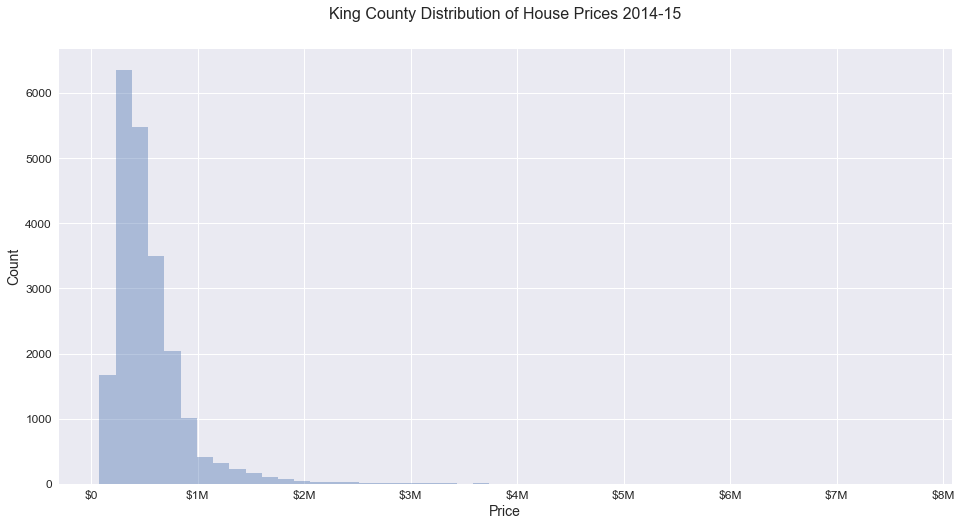

In [25]:
# Create a plot to look at the distribution of house prices across the county

existing_xvalues = [0,1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000]
readable_xvalues = ['$0','$1M','$2M','$3M','$4M','$5M','$6M','$7M','$8M']
plt.figure(figsize=(16,8))
plt.title('King County Distribution of House Prices 2014-15', fontsize=16, pad=30)
price_dist = sns.distplot(house_sales['price'], kde=False)
price_dist.set_xlabel('Price', fontsize=14)
price_dist.set_ylabel('Count', fontsize=14)
plt.xticks(existing_xvalues, readable_xvalues, fontsize=12)
plt.yticks(fontsize=12)
plt.show();

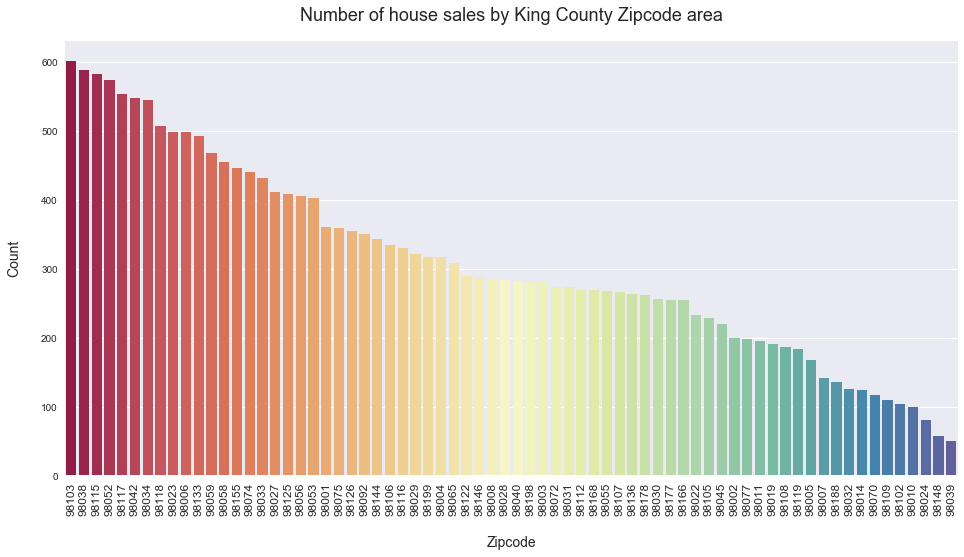

In [222]:
# Create new dataframe grouping the number of houses by zipcode area

zipcode_houses = house_sales.groupby(['zipcode']).size().reset_index(name='count')

# Create a plot to look at the number of houses within each zipcode area

plt.figure(figsize=(16,8))
plt.title('Number of house sales by King County Zipcode area', fontsize=18, pad=20)
zipcode_dist = sns.barplot(
    x=zipcode_houses['zipcode'],
    y=zipcode_houses['count'], 
    data=zipcode_houses,
    order=zipcode_houses.sort_values('count', ascending=False).zipcode,
    palette='Spectral'
)

zipcode_dist.set_xlabel('Zipcode', fontsize=14, labelpad=20)
zipcode_dist.set_ylabel('Count', fontsize=14, labelpad=20)
zipcode_dist.set_xticklabels(zipcode_dist.get_xticklabels(), rotation=90, fontsize=12)
plt.show();

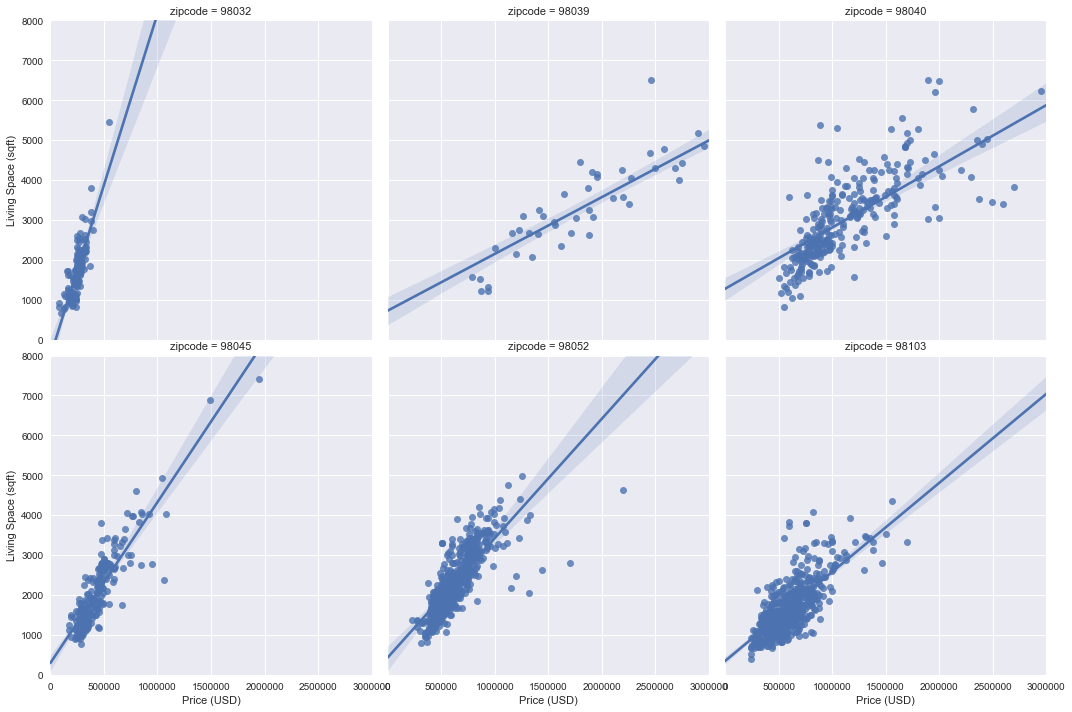

In [218]:
# Create a new dataframe filtering out specific zipcodes
# 98032 = Kent
# 98039 = Medina - least dense with house sales
# 98040 = Mercer Island
# 98045 = North Bend
# 98052 = Redmond
# 98103 = Seattle - most dense with house sales

zipcode_shorter = house_sales[(house_sales['zipcode']==98052)
                             | (house_sales['zipcode']==98032)
                             | (house_sales['zipcode']==98045)
                             | (house_sales['zipcode']==98040)
                             | (house_sales['zipcode']==98103)
                             | (house_sales['zipcode']==98039)]

# Create scatterplots to investigate how price varies with living space and between zipcodes

chart3 = sns.FacetGrid(zipcode_shorter, 
                  col="zipcode", 
                  col_wrap=3, 
                  ylim=(0, 8000), 
                  xlim=(0, 3000000),  
                  height=5)
chart3.map(sns.regplot, "price", "sqft_living", fit_reg=True, x_jitter=.1)
chart3.set_axis_labels('Price (USD)', 'Living Space (sqft)')
chart3.fig.subplots_adjust(wspace=.05, hspace=.05)
plt.show();

---
<a name="section2.2"></a>
## Parked Code

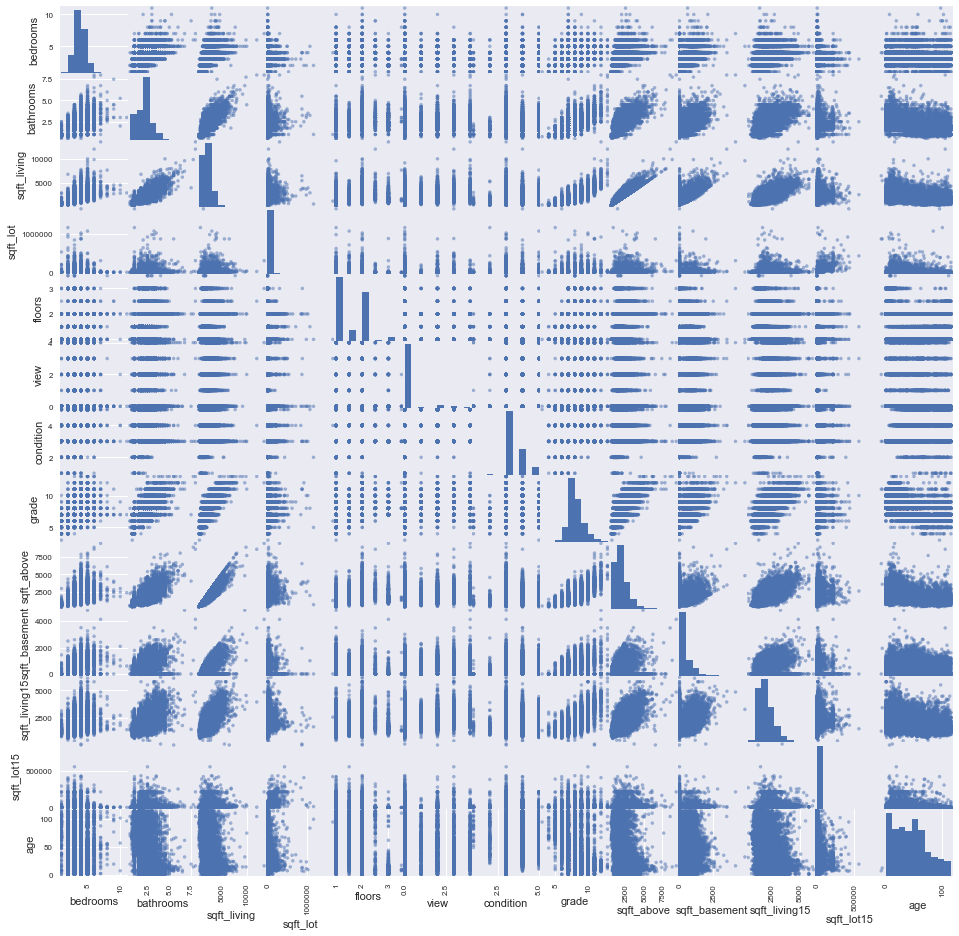

In [234]:
# Plot initial scatter matrix to get a sense of which variables have a relationship 
# and which are categorical (apart from the obvious that is)

predictors = ['bedrooms',
              'bathrooms',
              'sqft_living',
              'sqft_lot',
              'floors',
              'view',
              'condition',
              'grade',
              'sqft_above',
              'sqft_basement',
              'sqft_living15',
              'sqft_lot15',
              'age']
house_sales_pred = house_sales.loc[:, predictors]

pd.plotting.scatter_matrix(house_sales_pred,figsize  = [16, 16]);
plt.show();

In [231]:
# Log transform continuous variables and one-hot encode categoricals

continuous = ['price','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15','age']
categoricals = ['view','condition','grade','zipcode']

house_sales_cont = house_sales[continuous]

# Log features
log_names = [f'{column}_log' for column in house_sales_cont.columns]

house_sales_log = np.log(house_sales_cont)
house_sales_log.columns = log_names

# Normalize
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

house_sales_log_norm = house_sales_log.apply(normalize)

# One-hot encode categoricals
house_sales_ohe = pd.get_dummies(house_sales[categoricals], prefix=categoricals)

# hs_preprocessed = pd.concat([house_sales_cont, house_sales_log], axis=1)

# hs_preprocessed.head()

,price_log,sqft_living_log,sqft_lot_log,sqft_above_log,sqft_basement_log,sqft_living15_log,sqft_lot15_log,age_log
0,12.309982,7.073270,8.639411,7.073270,-inf,7.200425,8.639411,4.094345
1,13.195614,7.851661,8.887653,7.682482,5.991465,7.432484,8.941022,4.158883
2,12.100712,6.646391,9.210340,6.646391,-inf,7.908387,8.994917,4.406719
3,13.311329,7.580700,8.517193,6.956545,6.813445,7.215240,8.517193,3.912023
4,13.142166,7.426549,8.997147,7.426549,-inf,7.495542,8.923058,3.332205


In [ ]:
# Convert categorical variables using one-hot encoding

condition_dummies = pd.get_dummies(house_sales['condition'], prefix='cond_', drop_first=True)
grade_dummies = pd.get_dummies(house_sales['grade'], prefix='grad_', drop_first=True)


In [232]:
# Let's identify some multicollinearity

df = hs_preprocessed.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace=True)
df.drop(columns=['level_1', 'level_0'], inplace=True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)
df[(df.cc > 0.75) & (df.cc < 1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(grade, sqft_living)",0.762776
"(grade, sqft_above)",0.756069
"(bathrooms, sqft_living)",0.755755
